## Набор данных "Ближайшие к Земле объекты" 

In [3]:
#  Наборе данных "Ближайшие к Земле объекты" 
#   
#  1. Анализ сведений о наборе данных 
#      Набор данных о "ближайших к Земле объектах" относится к области астрофизики и исследования космических угроз. Проблемная область — мониторинг околоземных  объектов (Near-Earth  Objects, NEO), которые могут представлять потенциальную опасность для Земли. Цель анализа — оценить характеристики объектов, их орбиты,  скорость, и расстояние до Земли, чтобы предсказать возможность столкновения. 
#   
#  2. Анализ содержимого набора данных 
#      Объекты наблюдения: 
#          Космические тела, которые классифицируются как "околоземные объекты". 
#      Атрибуты объектов: 
#          id — идентификатор объекта. 
#          name — название объекта. 
#          est_diameter_min и est_diameter_max — оценочные минимальный и максимальный диаметры. 
#          relative_velocity — относительная скорость объекта. 
#          miss_distance — минимальное расстояние до Земли. 
#          orbiting_body — небесное тело, вокруг которого объект совершает движение (обычно Солнце). 
#          sentry_object — булевый признак, указывающий, находится ли объект в базе наблюдения системы Sentry. 
#          absolute_magnitude — абсолютная звёздная величина объекта. 
#          hazardous — булевый признак опасности объекта. 
#      Связи между объектами: 
#          Объекты могут быть связаны через общее орбитальное тело или группироваться по характеристикам орбит. 
#   
#  3. Примеры бизнес-целей 
#      Уведомление о космических угрозах: 
#          Построение системы прогнозирования опасных объектов для оперативного предупреждения. 
#          Эффект: повышение безопасности через своевременные предупреждения. 
#   
#      Оптимизация миссий для изучения астероидов: 
#          Идентификация объектов, подходящих для изучения (на основе характеристик орбиты и размера). 
#          Эффект: снижение затрат и повышение научной ценности миссий. 
#   
#  4. Примеры целей технического проекта 
#      Бизнес-цель: Предсказание опасности объекта. 
#          Входные данные: атрибуты объекта (диаметр, скорость, расстояние). 
#          Целевой признак: hazardous. 
#       
#      Бизнес-цель: Классификация объектов по характеристикам. 
#          Входные данные: абсолютная звёздная величина, диаметр, скорость. 
#          Целевой признак: принадлежность к определённой группе объектов. 

In [4]:
import pandas as pd

df = pd.read_csv('../../datasets/neo.csv')
df.head()

id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0       13569.249224   5.483974e+07         Earth          False   
1       73588.726663   6.143813e+07         Earth          False   
2      114258.692129   4.979872e+07         Earth          False   
3       24764.303138   2.543497e+07         Earth          False   
4       42737.733765   4.627557e+07         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20      False  
4               20.09       True

Количество пропущенных значений в каждом столбце:
id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64
Количество выбросов в столбце 'est_diameter_min': 8306
Количество выбросов в столбце 'est_diameter_max': 8306
Количество выбросов в столбце 'relative_velocity': 1574
Количество выбросов в столбце 'miss_distance': 0
Количество выбросов в столбце 'absolute_magnitude': 101


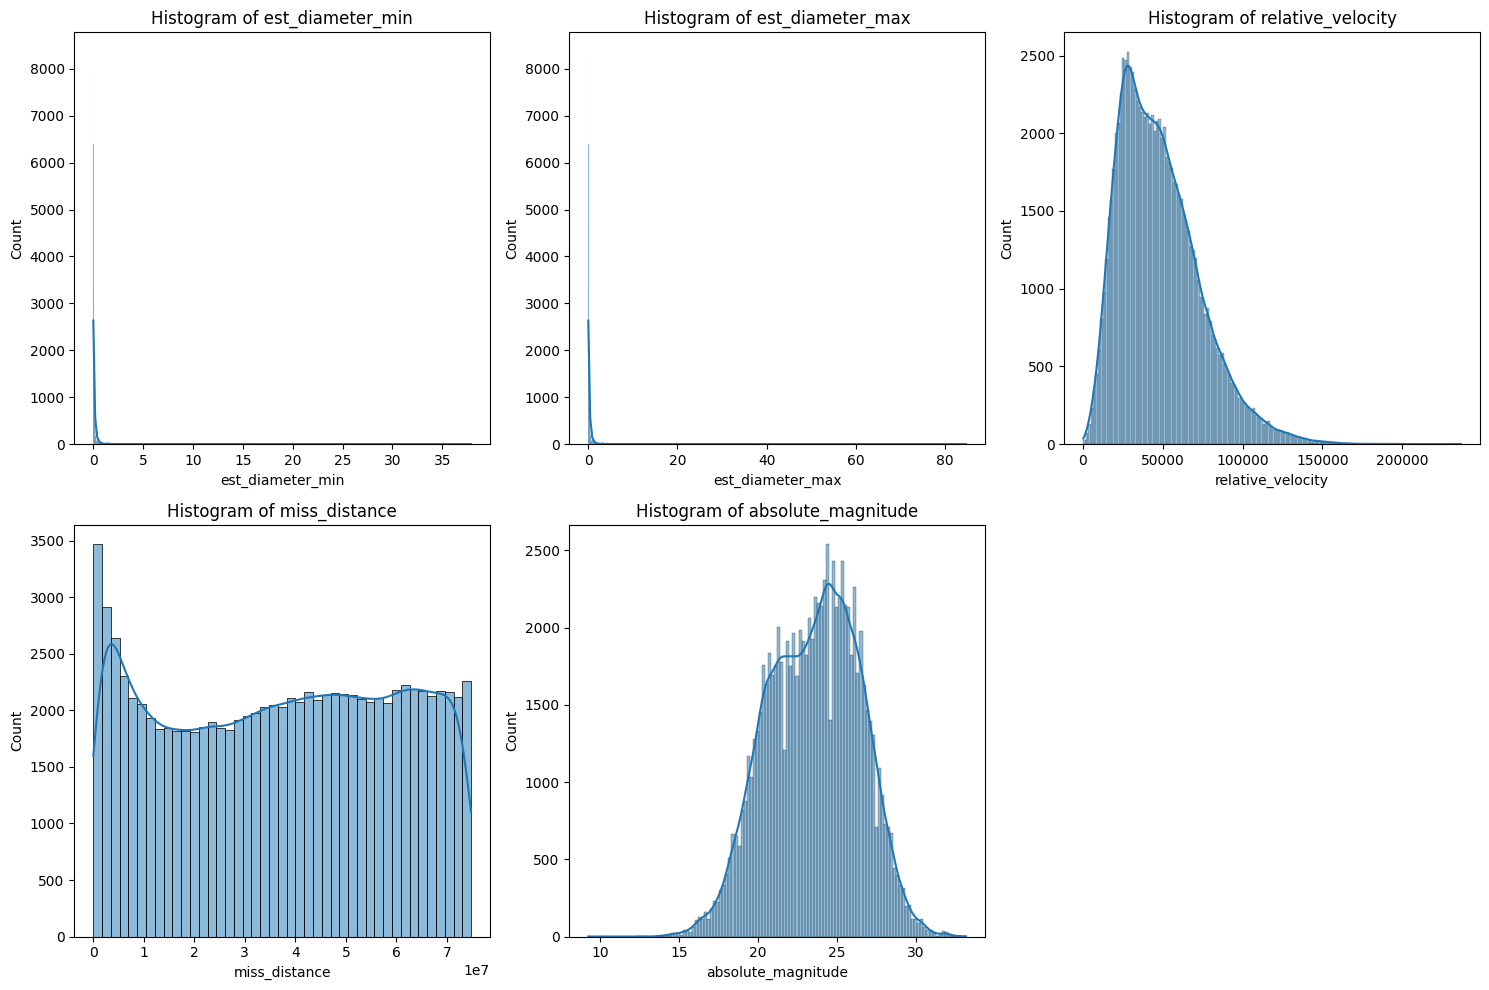

Количество выбросов в столбце 'est_diameter_min': 8306
Количество выбросов в столбце 'est_diameter_max': 8306
Количество выбросов в столбце 'relative_velocity': 1574


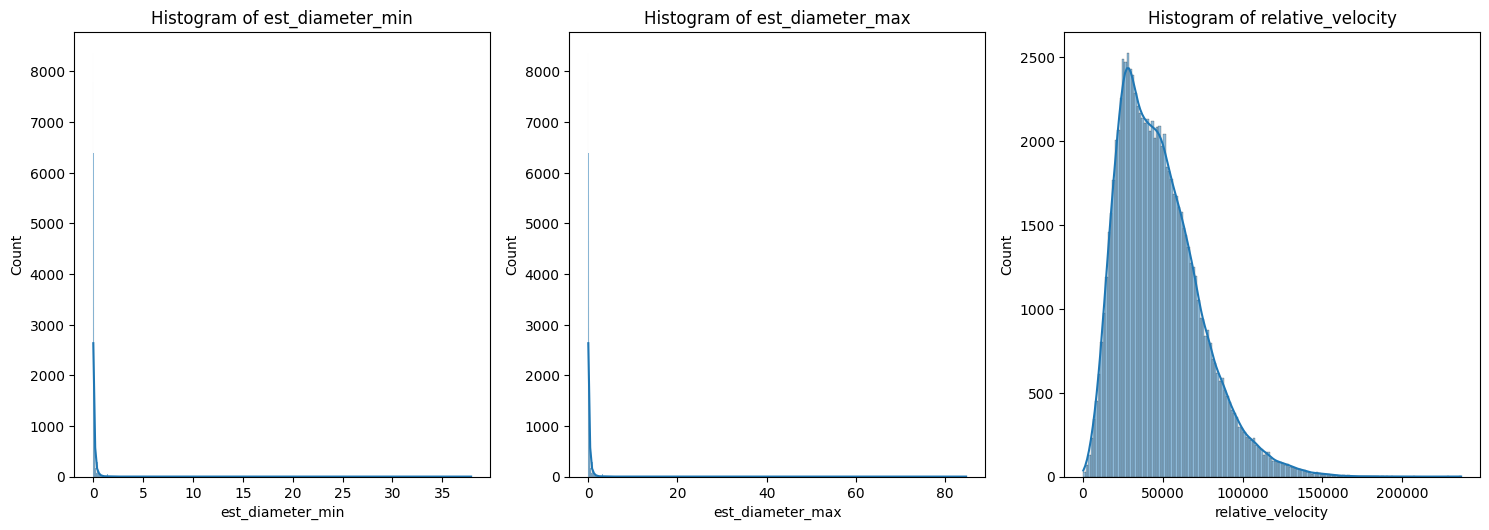

Обучающая выборка:  (63585, 7)
hazardous
False    57399
True      6186
Name: count, dtype: int64


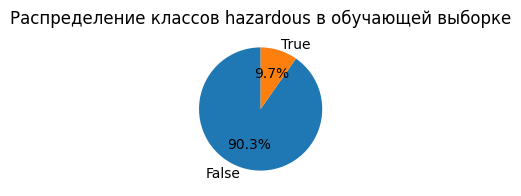

Контрольная выборка:  (13625, 7)
hazardous
False    12315
True      1310
Name: count, dtype: int64


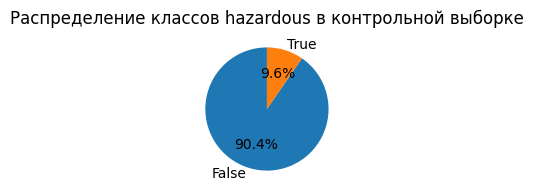

Тестовая выборка:  (13626, 7)
hazardous
False    12282
True      1344
Name: count, dtype: int64


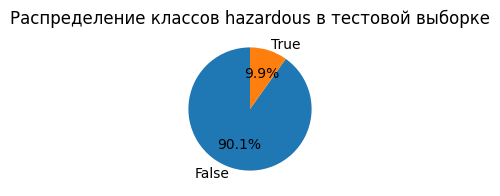

Обучающая выборка после оверсемплинга:  (115214, 7)
hazardous
True     57815
False    57399
Name: count, dtype: int64


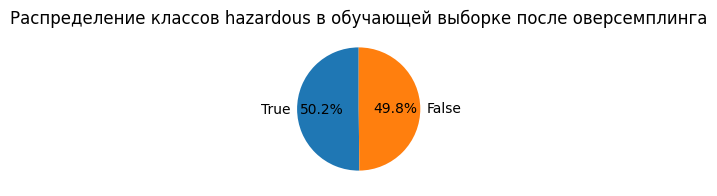

Обучающая выборка после андерсемплинга:  (12372, 7)
hazardous
False    6186
True     6186
Name: count, dtype: int64


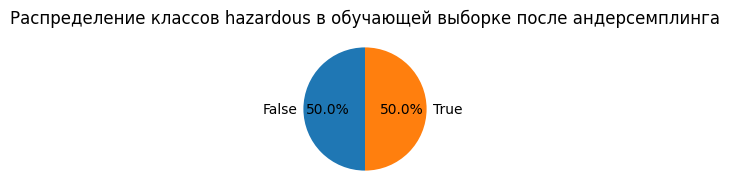

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../../datasets/neo.csv')
df = df.drop(columns=['name', 'orbiting_body', 'sentry_object'])


#5. Устранение пропущенных данных
    
#Сведения о пропущенных данных
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')


#Пропущенных данных в датасете нет




#6. Проблемы набора данных
    #5.1Выбросы: Возможны аномалии в значениях скорости или расстояния.
    #Смещение: Данные могут быть смещены в сторону объектов, которые легче обнаружить (крупные, близкие).

#7. Решения для обнаруженных проблем
    #Выбросы: Идентификация и обработка выбросов через методы (например, IQR или Z-оценка).
    #Смещение: Использование методов балансировки данных, таких как oversampling.

#7.1 Проверка набора данных на выбросы
# Выбираем столбцы для анализа
columns_to_check = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
def Emissions(columns_to_check):

    # Функция для подсчета выбросов
    def count_outliers(df, columns):
        outliers_count = {}
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Считаем количество выбросов
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_count[col] = len(outliers)
        
        return outliers_count

    # Подсчитываем выбросы
    outliers_count = count_outliers(df, columns_to_check)

    # Выводим количество выбросов для каждого столбца
    for col, count in outliers_count.items():
        print(f"Количество выбросов в столбце '{col}': {count}")
        
    # Создаем гистограммы
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns_to_check, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()
Emissions(columns_to_check)

#Признак miss_distance не имеет выбросов, 
#признак absolute_magnitude имеет количество выбросов в приемлемом диапазоне
#для признаков est_diameter_min, est_diameter_max и relative_velocity необходимо использовать метод решения проблемы выбросов. 
#Воспользуемся методом усреднения значений:
columns_to_fix = ['est_diameter_min', 'est_diameter_max', 'relative_velocity']
# Замена нулей и пропущенных значений средним
for column in columns_to_fix:
    # Расчет среднего, исключая 0 и NaN
    mean_value = df[df[column] > 0][column].mean()
    # Замена NaN и нулей на среднее
    df[column] = df[column].replace(0, np.nan).fillna(mean_value)

#Оценим выбросы в выборке после усреднения:
Emissions(columns_to_fix)

#Удалось избавиться от выбросов в соответствующих признаках как видно на диаграммах.



#8. Разбиение данных на выборки

from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Обучающая выборка: ", train_data.shape)
print(train_data.hazardous.value_counts())
hazardous_counts = train_data['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в обучающей выборке')
plt.show()

print("Контрольная выборка: ", val_data.shape)
print(val_data.hazardous.value_counts())
hazardous_counts = val_data['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в контрольной выборке')
plt.show()

print("Тестовая выборка: ", test_data.shape)
print(test_data.hazardous.value_counts())
hazardous_counts = test_data['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тестовой выборке')
plt.show()


#9. Оценить  сбалансированность  выборок  для  каждого  набора  данных.  Оценить необходимость использования методов приращения (аугментации) данных. 
#Выводы по сбалансированности
#Если распределение классов примерно равно (например, 50%/50%), выборка считается сбалансированной, и аугментация данных не требуется.
#Если один из классов сильно доминирует (например, 90%/10%), выборка несбалансированная, и может потребоваться аугментация данных.

#Данная сборка несбалансированная, и требуется аугментация данных.


#10. Выполнить приращение данных методами выборки с избытком (oversampling) и выборки  с  недостатком  (undersampling).  Должны  быть  представлены  примеры реализации обоих методов для выборок набора данных. 

#10.1
#Аугментация данных методом оверсемплинга¶
#Этот метод увеличивает количество примеров меньшинства.

from imblearn.over_sampling import ADASYN

# Создание экземпляра ADASYN
ada = ADASYN()

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(train_data.drop(columns=['hazardous']), train_data['hazardous'])

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
df_train_adasyn['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после оверсемплинга: ", df_train_adasyn.shape)
print(df_train_adasyn['hazardous'].value_counts())
hazardous_counts = df_train_adasyn['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в обучающей выборке после оверсемплинга')
plt.show()


#10.2
#Аугментация данных методом андерсемплинга
#Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(train_data.drop(columns=['hazardous']), train_data['hazardous'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после андерсемплинга: ", df_train_undersampled.shape)
print(df_train_undersampled['hazardous'].value_counts())

# Визуализация распределения классов
hazardous_counts = df_train_undersampled['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в обучающей выборке после андерсемплинга')
plt.show()

## Набор данных "Продажа домов в округе Кинг, США"

In [6]:
#  1. Анализ сведений о наборе данных "Продажа домов в округе Кинг, США"
#  Данный набор данных содержит информацию о работе филиалов супермаркетов. Проблемная область связана с анализом производительности магазинов, оптимизацией их #  работы и улучшением ключевых показателей, таких как продажи и привлечение клиентов. Основные вопросы, которые могут возникнуть:
#  
#  2. Анализ содержимого набора данных
#      Объекты наблюдения
#          Каждая строка представляет собой данные о конкретном магазине.
#  
#      Атрибуты объектов
#          Store ID (идентификатор магазина): уникальный номер, однозначно идентифицирующий магазин.
#          Store_Area (площадь магазина): общая площадь магазина в квадратных метрах.
#          Items_Available (количество доступных товаров): общее количество товаров в магазине.
#          Daily_Customer_Count (ежедневное число покупателей): среднее число покупателей в день.
#          Store_Sales (продажи магазина): общая выручка магазина.
#  
#      Связи между объектами
#          Объекты (магазины) связаны общей бизнес-целью (рост прибыли) и схожими условиями работы (товары, покупатели,площади). Возможные связи:
#              Прямая связь между числом покупателей и выручкой.
#              Влияние площади и ассортимента на посещаемость и продажи.
#  
#  3. Примеры бизнес-целей и эффекты для бизнеса
#      Бизнес-цели
#          Оптимизация ассортимента: определить, как ассортимент товаров влияет на продажи.
#          Увеличение посещаемости: найти факторы, повышающие интерес покупателей к магазину.
#          Оптимизация площадей: выявить оптимальные площади магазинов для максимальной выручки.
#          Анализ производительности филиалов: сравнить эффективность магазинов и выявить лучшие практики.
#      Эффекты для бизнеса
#          Повышение выручки за счет оптимизации ассортимента и улучшения опыта покупателей.
#          Сокращение затрат на неэффективные площади.
#          Более точное планирование при открытии новых магазинов.
#  
#  4. Примеры целей технического проекта
#      Цель 1: Оптимизация ассортимента
#          Входные данные: Store_Area, Items_Available, Store_Sales.
#          Целевой признак: Store_Sales.
#          Результат: рекомендации по увеличению или уменьшению ассортимента.
#      Цель 2: Увеличение посещаемости
#          Входные данные: Store_Area, Items_Available, Store_Sales.
#          Целевой признак: Daily_Customer_Count.
#          Результат: прогноз посещаемости на основе характеристик магазина.
#      Цель 3: Оптимизация площадей
#          Входные данные: Store_Area, Store_Sales.
#          Целевой признак: Store_Sales.
#          Результат: определение оптимальной площади для магазина.
#      Цель 4: Анализ производительности филиалов
#          Входные данные: Все атрибуты.
#          Целевой признак: Store_Sales.
#          Результат: классификация магазинов по эффективности и выявление отстающих филиалов.

In [7]:
df = pd.read_csv('../../datasets/kc_house_data.csv')
df.head()
#df.select_dtypes(include=np.number).columns.tolist()[1:]

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

Количество пропущенных значений в каждом столбце:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Количество выбросов в столбце 'price': 1146
Количество выбросов в столбце 'sqft_living': 572
Количество выбросов в столбце 'bathrooms': 571
Количество выбросов в столбце 'yr_built': 0


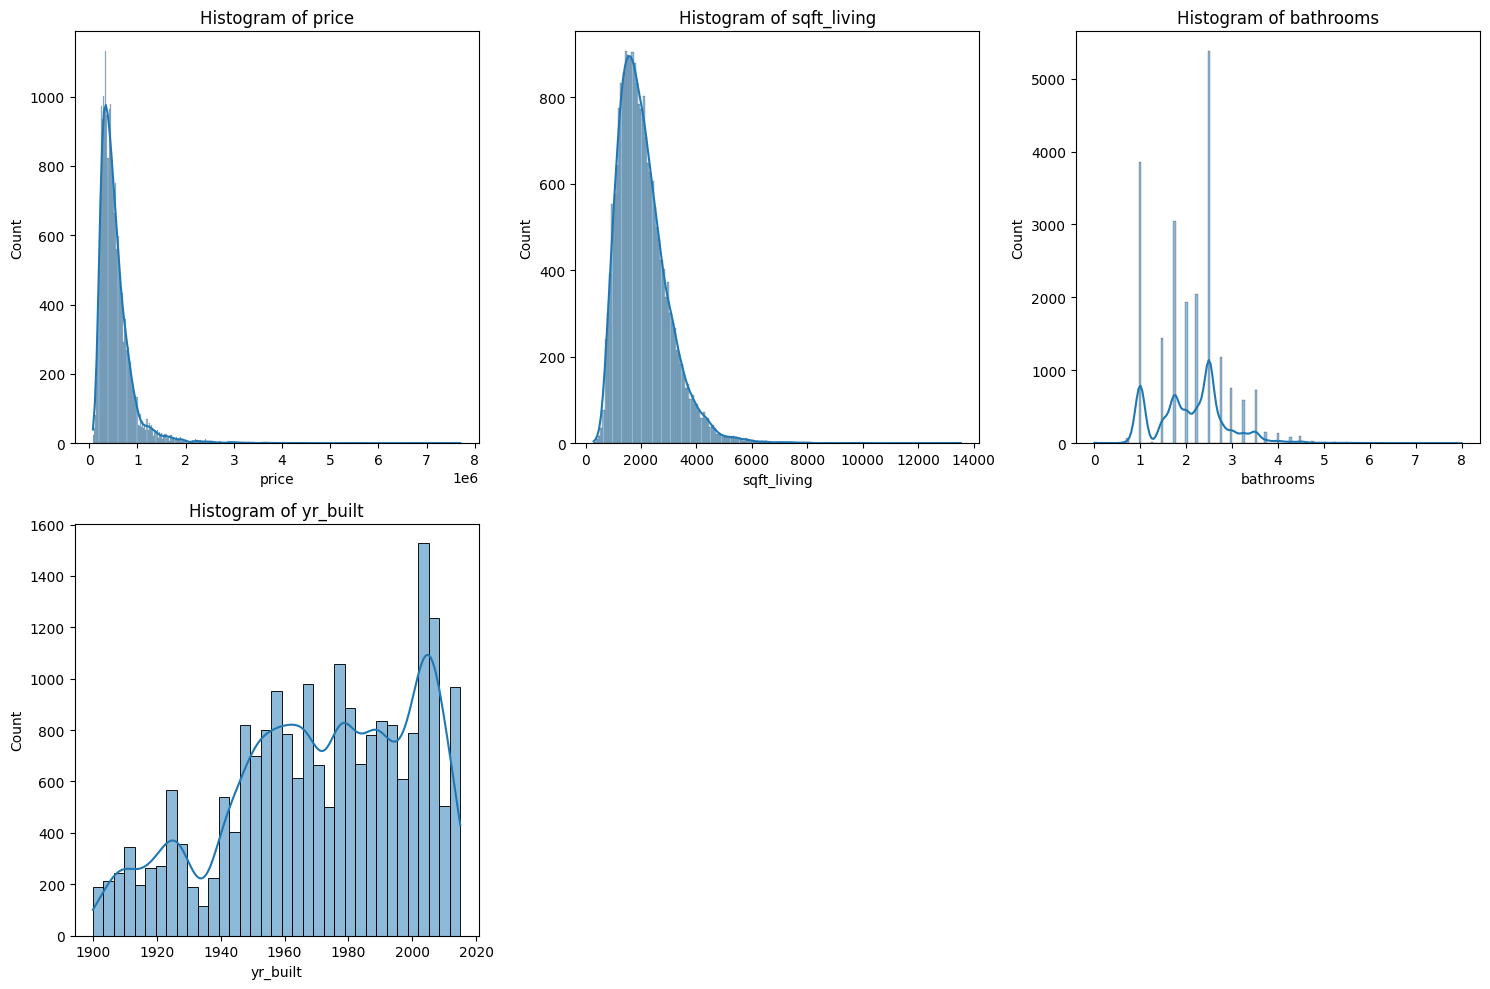

Количество удаленных строк: 1520
Количество выбросов в столбце 'price': 211
Количество выбросов в столбце 'sqft_living': 34
Количество выбросов в столбце 'bathrooms': 0


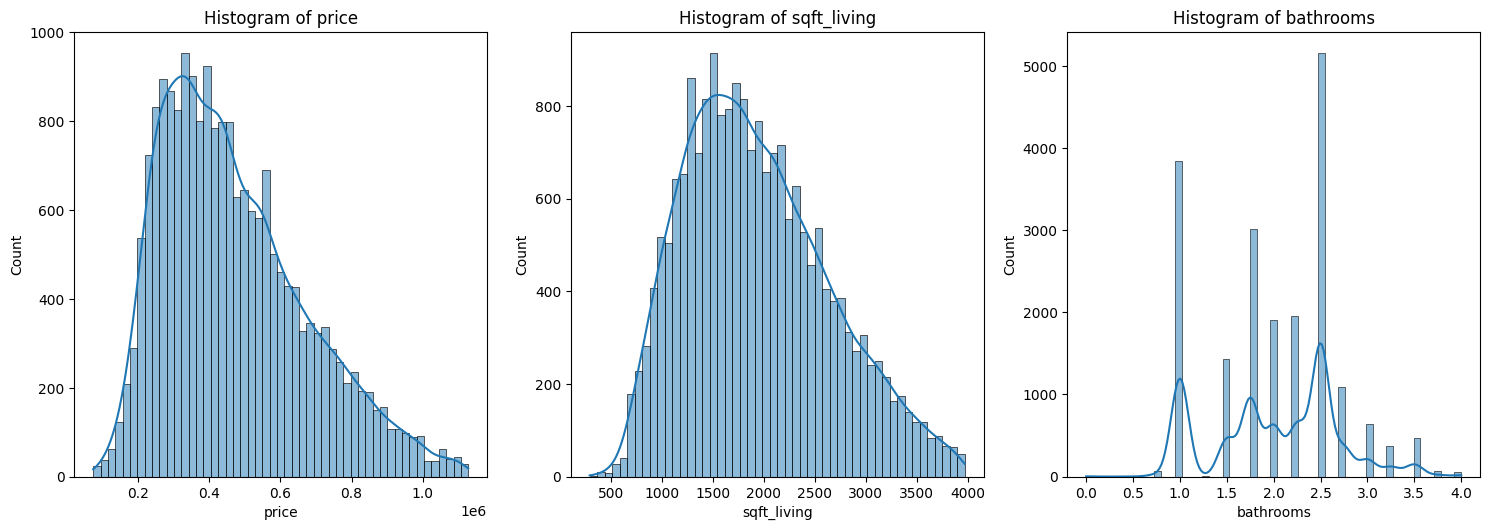

Средняя цена в обучающей выборке: 470646.91546391754
Средняя цена в контрольной выборке: 468579.52654280025
Средняя цена в тестовой выборке: 471598.4402786994

Стандартное отклонение цены в обучающей выборке: 202445.70321089853
Стандартное отклонение цены в контрольной выборке: 202183.1175619316
Стандартное отклонение цены в тестовой выборке: 206393.61053704965

Распределение по квартилам (обучающая):
0.25    313500.0
0.50    435000.0
0.75    594000.0
Name: price, dtype: float64

Распределение по квартилам (контрольная):
0.25    313612.5
0.50    429925.0
0.75    595000.0
Name: price, dtype: float64

Распределение по квартилам (тестовая):
0.25    312500.0
0.50    428500.0
0.75    595375.0
Name: price, dtype: float64


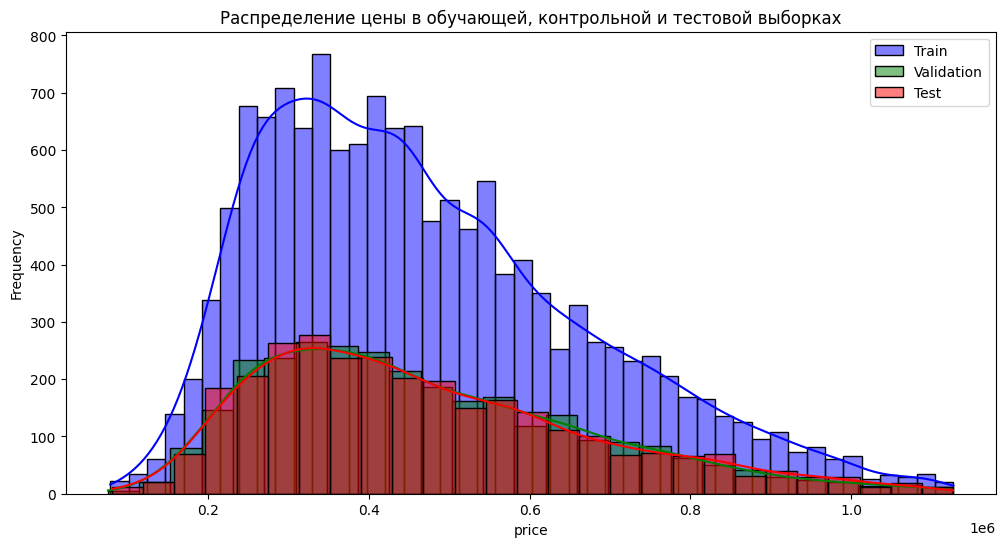

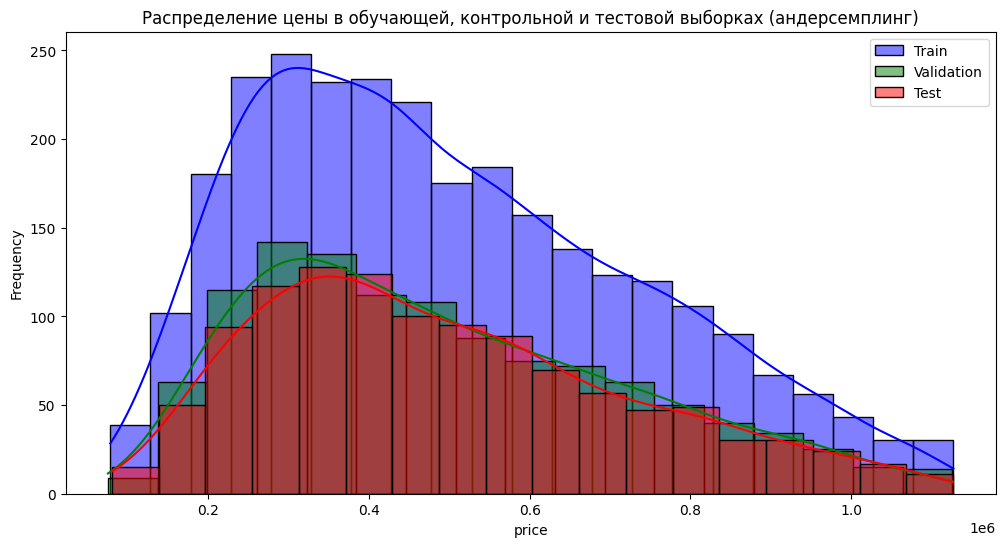

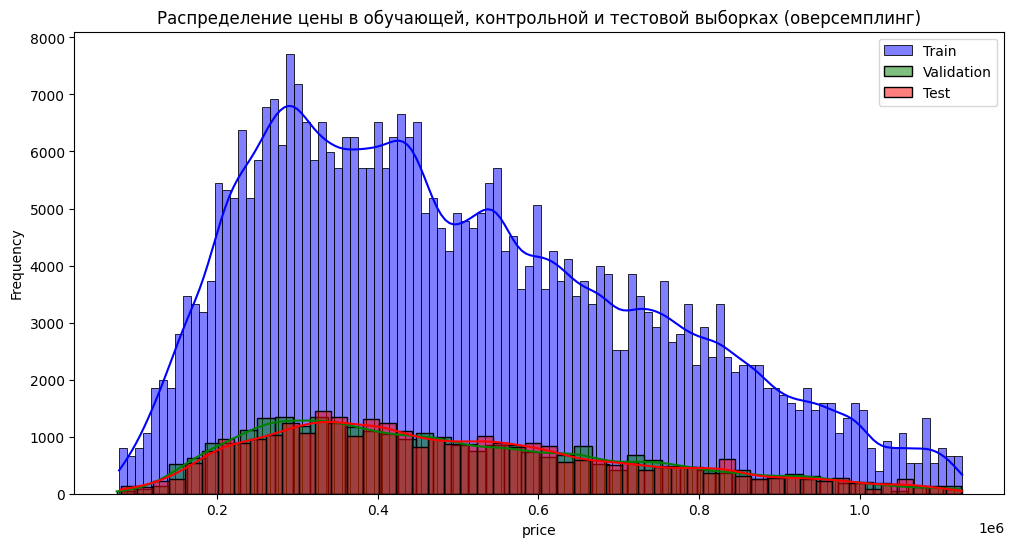

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../../datasets/kc_house_data.csv')
df = df.drop(columns=['id'])


#5. Устранение пропущенных данных
    
#Сведения о пропущенных данных
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')


#Пропущенных данных в датасете нет




#6. Проблемы набора данных
    #5.1Выбросы: Возможны аномалии в значениях скорости или расстояния.
    #Смещение: Данные могут быть смещены в сторону объектов, которые легче обнаружить (крупные, близкие).

#7. Решения для обнаруженных проблем
    #Выбросы: Идентификация и обработка выбросов через методы (например, IQR или Z-оценка).
    #Смещение: Использование методов балансировки данных, таких как oversampling.

#7.1 Проверка набора данных на выбросы
# Выбираем столбцы для анализа
columns_to_check = ['price', 'sqft_living', 'bathrooms', 'yr_built']
def Emissions(columns_to_check):

    # Функция для подсчета выбросов
    def count_outliers(df, columns):
        outliers_count = {}
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Считаем количество выбросов
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_count[col] = len(outliers)
        
        return outliers_count

    # Подсчитываем выбросы
    outliers_count = count_outliers(df, columns_to_check)

    # Выводим количество выбросов для каждого столбца
    for col, count in outliers_count.items():
        print(f"Количество выбросов в столбце '{col}': {count}")
        
    # Создаем гистограммы
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns_to_check, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()
Emissions(columns_to_check)

#Признак yr_built не имеет выбросов, 
#для признаков 'price', 'sqft_living', 'bathrooms' необходимо использовать метод решения проблемы выбросов. 
#Воспользуемся методом удаления наблюдений с такими выбросами:
# Выбираем столбцы для очистки
columns_to_fix =  ['price', 'sqft_living', 'bathrooms']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_fix)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

df = df_cleaned

#Оценим выбросы в выборке после усреднения:
Emissions(columns_to_fix)

#Удалось избавиться от выбросов в соответствующих признаках как видно на диаграммах.



#8. Разбиение данных на выборки

from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Средние значения цены
print("Средняя цена в обучающей выборке:", train_data['price'].mean())
print("Средняя цена в контрольной выборке:", val_data['price'].mean())
print("Средняя цена в тестовой выборке:", test_data['price'].mean())
print()

# Стандартное отклонение цены
print("Стандартное отклонение цены в обучающей выборке:", train_data['price'].std())
print("Стандартное отклонение цены в контрольной выборке:", val_data['price'].std())
print("Стандартное отклонение цены в тестовой выборке:", test_data['price'].std())
print()

# Проверка распределений по количеству объектов в диапазонах
print("Распределение по квартилам (обучающая):")
print(train_data['price'].quantile([0.25, 0.5, 0.75]))
print()
print("Распределение по квартилам (контрольная):")
print(val_data['price'].quantile([0.25, 0.5, 0.75]))
print()
print("Распределение по квартилам (тестовая):")
print(test_data['price'].quantile([0.25, 0.5, 0.75]))

# Построение гистограмм для каждой выборки
plt.figure(figsize=(12, 6))

sns.histplot(train_data['price'], color='blue', label='Train', kde=True)
sns.histplot(val_data['price'], color='green', label='Validation', kde=True)
sns.histplot(test_data['price'], color='red', label='Test', kde=True)

plt.legend()
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Распределение цены в обучающей, контрольной и тестовой выборках')
plt.show()


#9. Оценить  сбалансированность  выборок  для  каждого  набора  данных.  Оценить необходимость использования методов приращения (аугментации) данных. 
#Выводы по сбалансированности
#Если распределение классов примерно равно (например, 50%/50%), выборка считается сбалансированной, и аугментация данных не требуется.
#Если один из классов сильно доминирует (например, 90%/10%), выборка несбалансированная, и может потребоваться аугментация данных.

#Выборки оказались недостаточно сбалансированными. Используем методы приращения данных с избытком и с недостатком:


#10. Выполнить приращение данных методами выборки с избытком (oversampling) и выборки  с  недостатком  (undersampling).  Должны  быть  представлены  примеры реализации обоих методов для выборок набора данных. 

#10.1
#Аугментация данных методом оверсемплинга¶
#Этот метод увеличивает количество примеров меньшинства.

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1) 
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_data, 'price')
val_df_oversampled = oversample(val_data, 'price')
test_df_oversampled = oversample(test_data, 'price')

train_df_undersampled = undersample(train_data, 'price')
val_df_undersampled = undersample(val_data, 'price')
test_df_undersampled = undersample(test_data, 'price')

# Построение гистограмм для каждой выборки
plt.figure(figsize=(12, 6))

sns.histplot(train_df_undersampled['price'], color='blue', label='Train', kde=True)
sns.histplot(val_df_undersampled['price'], color='green', label='Validation', kde=True)
sns.histplot(test_df_undersampled['price'], color='red', label='Test', kde=True)

plt.legend()
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Распределение цены в обучающей, контрольной и тестовой выборках (андерсемплинг)')
plt.show()

# Построение гистограмм для каждой выборки
plt.figure(figsize=(12, 6))

sns.histplot(train_df_oversampled['price'], color='blue', label='Train', kde=True)
sns.histplot(val_df_oversampled['price'], color='green', label='Validation', kde=True)
sns.histplot(test_df_oversampled['price'], color='red', label='Test', kde=True)

plt.legend()
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Распределение цены в обучающей, контрольной и тестовой выборках (оверсемплинг)')
plt.show()

## Набор данных "Показатели сердечно-сосудистых заболеваний (за 2022 год)"

In [9]:
#  1. Анализ сведений о наборе данных
#      Этот набор данных из Kaggle, вероятно, относится к исследованию диагностики диабета у женщин индийского происхождения. Набор данных изначально был взят из Национального института диабета и болезней пищеварения и почек (Pima Indians Diabetes Database).
#  
#      Проблемная область
#          Основная проблемная область — медицинская диагностика. Цель данных — предсказать наличие диабета у пациента на основе медицинских показателей (например, уровня глюкозы, давления, ИМТ) и других факторов.
#  
#  2. Анализ содержимого набора данных
#      Объекты наблюдения
#          Объектами наблюдения являются медицинские записи пациентов (768 строк). Каждая строка представляет собой данные о состоянии конкретного пациента.
#  
#      Атрибуты объектов
#          Pregnancies (количество беременностей) — числовой признак.
#          Glucose (уровень глюкозы в крови) — числовой признак.
#          BloodPressure (артериальное давление) — числовой признак.
#          SkinThickness (толщина кожной складки) — числовой признак.
#          Insulin (уровень инсулина) — числовой признак.
#          BMI (индекс массы тела) — вещественный признак.
#          DiabetesPedigreeFunction (генетическая предрасположенность к диабету) — вещественный признак.
#          Age (возраст) — числовой признак.
#          Outcome (наличие диабета) — целевой бинарный признак (1 — диабет, 0 — нет).
#          
#      Связи между объектами
#          Объекты наблюдения независимы друг от друга, так как каждый пациент представлен в одном экземпляре.
#  
#  3. Примеры бизнес-целей
#      Улучшение диагностики диабета
#          Создание инструмента для раннего выявления диабета на основе медицинских данных.
#          Эффект: Снижение затрат на лечение поздних стадий диабета, повышение уровня здоровья пациентов.
#  
#      Оптимизация медицинских услуг
#          Предсказание риска диабета для отдельных групп населения.
#          Эффект: Перераспределение ресурсов на профилактические меры и профилактические программы.
#  
#      Поддержка медицинских решений
#          Автоматизированная рекомендация дополнительных обследований или консультаций для пациентов с высоким риском.
#          Эффект: Ускорение процесса диагностики, уменьшение нагрузки на врачей.
#  
#  4. Примеры целей технического проекта
#      Цель 1: Улучшение диагностики диабета
#          Вход: Все признаки, кроме Outcome.
#          Целевой признак: Outcome (наличие диабета).
#          Результат: Модель классификации, которая определяет, есть ли у пациента диабет.
#      Цель 2: Оптимизация медицинских услуг
#          Вход: Социально-демографические данные (возраст, количество беременностей) и факторы здоровья (ИМТ, глюкоза).
#          Целевой признак: Вероятность (риск) наличия диабета.
#          Результат: Отчет о вероятности диабета для различных групп пациентов.
#      Цель 3: Поддержка медицинских решений
#          Вход: Все признаки набора данных.
#          Целевой признак: Рекомендации для дальнейших действий (например, "провести анализ инсулина", "назначить консультацию эндокринолога").
#          Результат: Система поддержки принятия решений для врачей.
#  

In [10]:
df = pd.read_csv('../../datasets/diabetes.csv')
df.head()
#df.select_dtypes(include=np.number).columns.tolist()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Количество пропущенных значений в каждом столбце:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Количество выбросов в столбце 'Pregnancies': 4
Количество выбросов в столбце 'Glucose': 5
Количество выбросов в столбце 'BloodPressure': 45
Количество выбросов в столбце 'SkinThickness': 1
Количество выбросов в столбце 'Insulin': 34
Количество выбросов в столбце 'BMI': 19


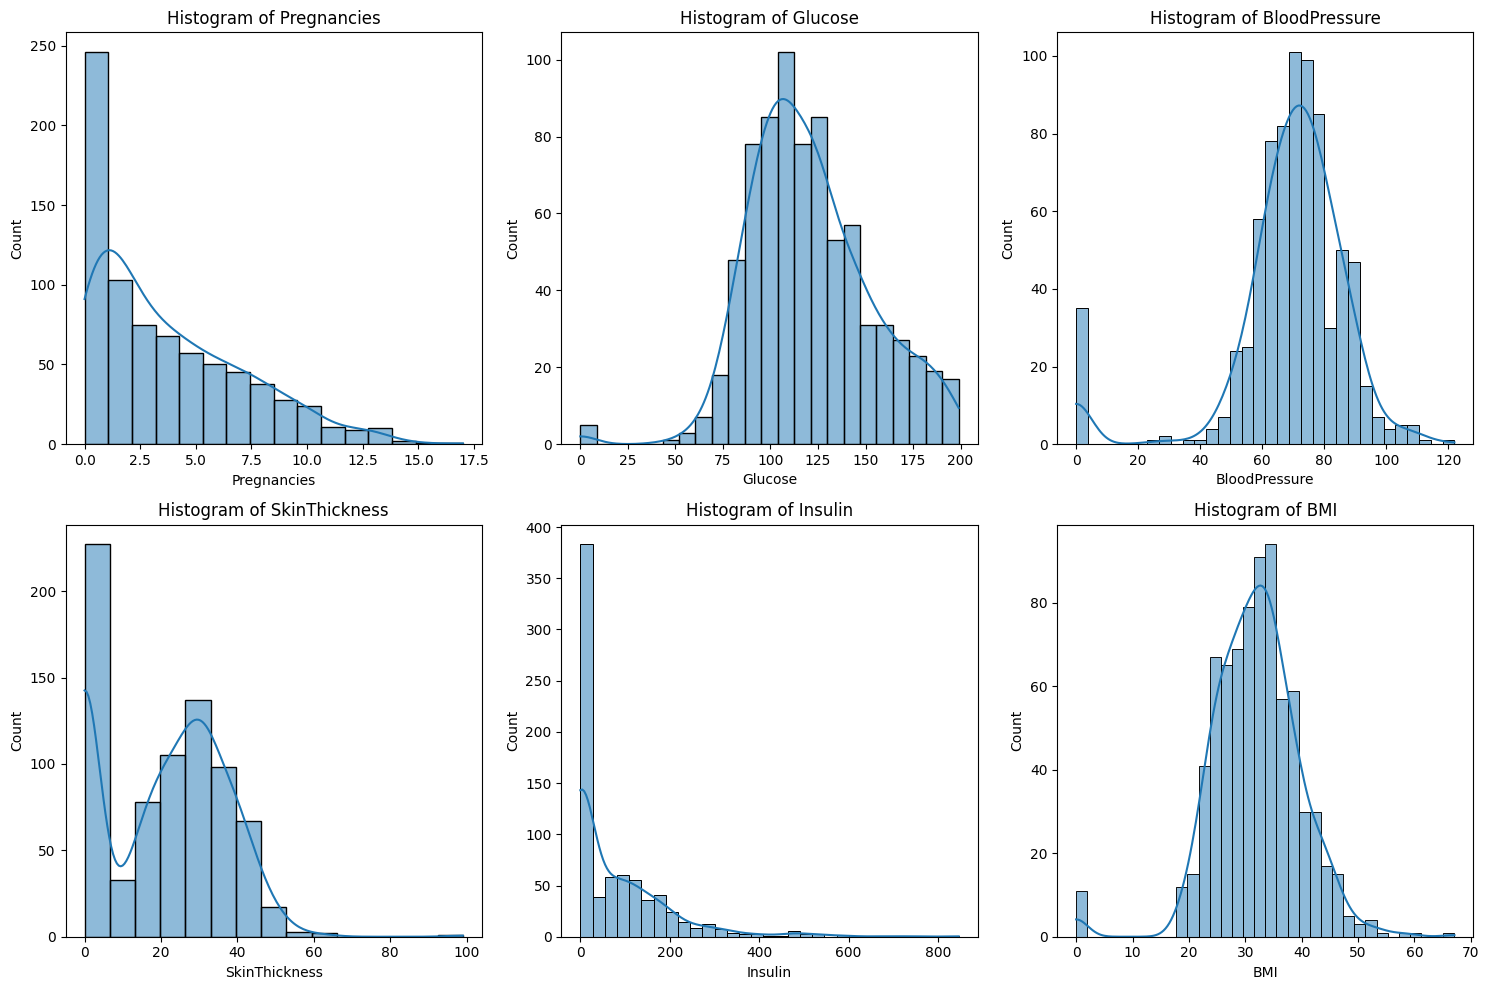

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Обучающая выборка:  (537, 9)
Outcome
0    349
1    188
Name: count, dtype: int64


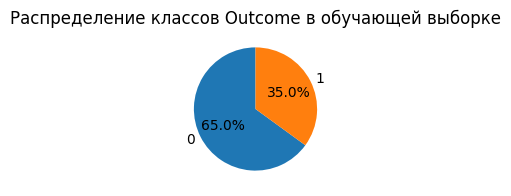

Контрольная выборка:  (115, 9)
Outcome
0    78
1    37
Name: count, dtype: int64


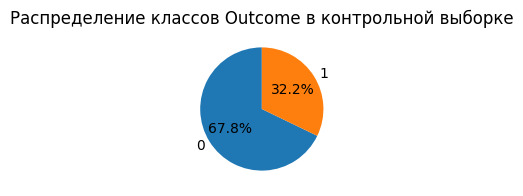

Тестовая выборка:  (116, 9)
Outcome
0    73
1    43
Name: count, dtype: int64


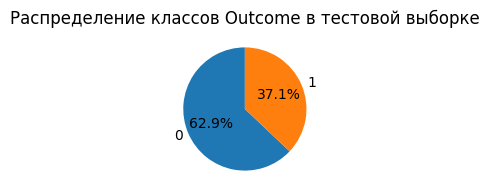

Обучающая выборка после оверсемплинга:  (677, 9)
Outcome
0    349
1    328
Name: count, dtype: int64


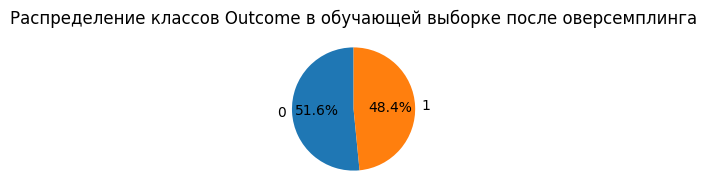

Обучающая выборка после андерсемплинга:  (376, 9)
Outcome
0    188
1    188
Name: count, dtype: int64


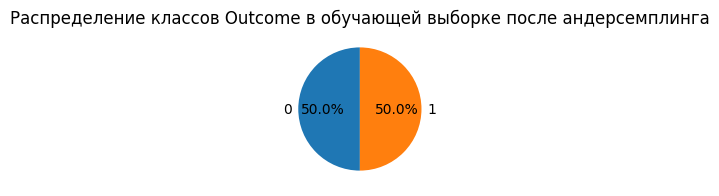

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../../datasets/diabetes.csv')
#df = df.drop(columns=['name', 'orbiting_body', 'sentry_object'])


#5. Устранение пропущенных данных
    
#Сведения о пропущенных данных
print("Количество пропущенных значений в каждом столбце:")
print(df.isnull().sum())

# Процент пропущенных значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} Процент пустых значений: %{null_rate:.2f}')

#Пропущенных данных в датасете нет



#6. Проблемы набора данных
    #5.1Выбросы: Возможны аномалии в значениях скорости или расстояния.
    #Смещение: Данные могут быть смещены в сторону объектов, которые легче обнаружить (крупные, близкие).

#7. Решения для обнаруженных проблем
    #Выбросы: Идентификация и обработка выбросов через методы (например, IQR или Z-оценка).
    #Смещение: Использование методов балансировки данных, таких как oversampling.

#7.1 Проверка набора данных на выбросы
# Выбираем столбцы для анализа
columns_to_check = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
def Emissions(columns_to_check):

    # Функция для подсчета выбросов
    def count_outliers(df, columns):
        outliers_count = {}
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Считаем количество выбросов
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outliers_count[col] = len(outliers)
        
        return outliers_count

    # Подсчитываем выбросы
    outliers_count = count_outliers(df, columns_to_check)

    # Выводим количество выбросов для каждого столбца
    for col, count in outliers_count.items():
        print(f"Количество выбросов в столбце '{col}': {count}")
        
    # Создаем гистограммы
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns_to_check, 1):
        plt.subplot(2, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()
Emissions(columns_to_check)

#Признакb 'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI' имеют количество выбросов в приемлемом диапазоне
#Не нужно проводить устранять проблему  пропущенных  данных.

#Подстановка константного значения для пропущенных данных. (пример так как кол-во выбросов в пределах нормы)
constant_value = 0  # Например, подставим 0
df.fillna(constant_value, inplace=True)
print(df_cleaned.isna().sum())


#8. Разбиение данных на выборки

train_data, temp_data = train_test_split(df, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print("Обучающая выборка: ", train_data.shape)
print(train_data.Outcome.value_counts())
Outcome_counts = train_data['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(Outcome_counts, labels=Outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в обучающей выборке')
plt.show()

print("Контрольная выборка: ", val_data.shape)
print(val_data.Outcome.value_counts())
Outcome_counts = val_data['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(Outcome_counts, labels=Outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в контрольной выборке')
plt.show()

print("Тестовая выборка: ", test_data.shape)
print(test_data.Outcome.value_counts())
Outcome_counts = test_data['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(Outcome_counts, labels=Outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тестовой выборке')
plt.show()


#9. Оценить  сбалансированность  выборок  для  каждого  набора  данных.  Оценить необходимость использования методов приращения (аугментации) данных. 
#Выводы по сбалансированности
#Если распределение классов примерно равно (например, 50%/50%), выборка считается сбалансированной, и аугментация данных не требуется.
#Если один из классов сильно доминирует (например, 90%/10%), выборка несбалансированная, и может потребоваться аугментация данных.

#Данная сборка несбалансированная, и требуется аугментация данных.


#10. Выполнить приращение данных методами выборки с избытком (oversampling) и выборки  с  недостатком  (undersampling).  Должны  быть  представлены  примеры реализации обоих методов для выборок набора данных. 

#10.1
#Аугментация данных методом оверсемплинга¶
#Этот метод увеличивает количество примеров меньшинства.

from imblearn.over_sampling import ADASYN

# Создание экземпляра ADASYN
ada = ADASYN()

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(train_data.drop(columns=['Outcome']), train_data['Outcome'])

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
df_train_adasyn['Outcome'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после оверсемплинга: ", df_train_adasyn.shape)
print(df_train_adasyn['Outcome'].value_counts())
Outcome_counts = df_train_adasyn['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(Outcome_counts, labels=Outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в обучающей выборке после оверсемплинга')
plt.show()


#10.2
#Аугментация данных методом андерсемплинга
#Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(train_data.drop(columns=['Outcome']), train_data['Outcome'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['Outcome'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после андерсемплинга: ", df_train_undersampled.shape)
print(df_train_undersampled['Outcome'].value_counts())

# Визуализация распределения классов
Outcome_counts = df_train_undersampled['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(Outcome_counts, labels=Outcome_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в обучающей выборке после андерсемплинга')
plt.show()